In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

In [5]:
# Function to map each intensity level to output intensity level.
def pixelVal(pix, r1, s1, r2, s2):
    if (0 <= pix and pix <= r1):
        return (s1 / r1)*pix
    elif (r1 < pix and pix <= r2):
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
    else:
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2


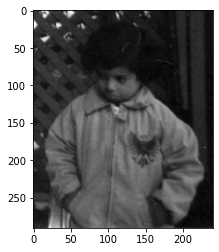

In [8]:
img = cv2.imread('./imageEx/pout.tif',0)
plt.imshow(img,cmap='gray')

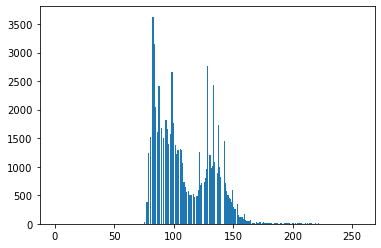

In [9]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

In [10]:
# Define parameters.
r1 = 75
s1 = 0
r2 = 170
s2 = 255

In [11]:
# Vectorize the function to apply it to each value in the Numpy array.
pixelVal_vec = np.vectorize(pixelVal)

In [12]:
# Apply contrast stretching.
contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2)

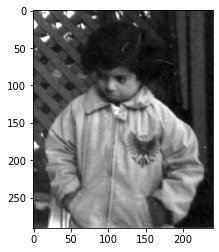

In [13]:
plt.imshow(contrast_stretched,cmap='gray')

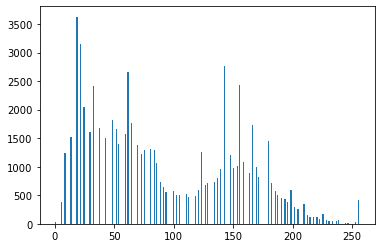

In [14]:
plt.hist(contrast_stretched.ravel(),256,[0,256]); plt.show()